1. break down the type of stuttering and calculate statistics
2. check transcription accuracy of the audio and transcription file
    - using different parameter


# Installation

In [2]:
!pip install numpy pandas scipy


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import IPython
import os
import sys
import random
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Setup

In [100]:
selection_count = 10
directory_path = "/projectnb/ds549/projects/AImpower/datasets"
gt_path = "/projectnb/ds549/projects/AImpower/ground_truth_transcript"

In [101]:
for file in os.listdir(directory_path):
    print(file)

for file in os.listdir(gt_path):
    print(file)

updated_annotation_deid_full
audio_deid_full
D00XX_A_ground_truth_cleaned.csv
P00XX_ground_truth_cleaned.csv
data_analysis_stuttered_speech_fall_24_EDA.ipynb


## Notes
* ```audio/segments``` ==> ```annotation/D*_A.txt```
* ```audio/recitation``` ==> ```annotation/P*.txt``` 
    * does not really have many stuttering transcription
* ```annotation/*_B.txt```: from moderator but moderator's audios are not segmented so need to be retrieved from the complete meeting file

# Put Annotation & Audio into pd.DataFrames

In [102]:
annotation_path = os.path.join(directory_path, "updated_annotation_deid_full")
audio_path = os.path.join(directory_path, "audio_deid_full")
ground_truth_A = os.path.join(gt_path, "D00XX_A_ground_truth_cleaned.csv")
ground_truth_P = os.path.join(gt_path, "P00XX_ground_truth_cleaned.csv")
folders = random.choices(os.listdir(audio_path), k=selection_count)

In [103]:
data = dict()

for folder in folders:
    
    data[folder] = dict()
    
    # audio file retrieval
    index = []
    audio_start_time = []
    audio_end_time = []
    audio_filename = []
    
    for subfile in os.listdir(os.path.join(audio_path, f"{folder}/segments")):
        meta_file_info = subfile.split("_")
        
        index.append(meta_file_info[0])
        audio_start_time.append(float(meta_file_info[1]) / 1000)
        audio_end_time.append(float(meta_file_info[2][:-4]) / 1000)
        audio_filename.append(os.path.join(audio_path, f"{folder}/segments/{subfile}"))
        
    data_appender = {'index': index, 'audio-start-time': audio_start_time, 'audio-end-time': audio_end_time, 'audio-segment-filename': audio_filename}
    data[folder]['audio_A'] = pd.DataFrame(data_appender)
    data[folder]['audio_A'] = data[folder]['audio_A'].sort_values(by=['audio-start-time'], ascending=True)
    
    
    index = []
    audio_start_time = []
    audio_end_time = []
    audio_filename = []
    
    for subfile in os.listdir(os.path.join(audio_path, f"{folder}/recitation")):
        meta_file_info = subfile.split("_")
        
        index.append(meta_file_info[0])
        audio_start_time.append(float(meta_file_info[1]) / 1000)
        audio_end_time.append(float(meta_file_info[2][:-4]) / 1000)
        audio_filename.append(os.path.join(audio_path, f"{folder}/recitation/{subfile}"))
        
    data_appender = {'index': index, 'audio-start-time': audio_start_time, 'audio-end-time': audio_end_time, 'audio-segment-filename': audio_filename}
    data[folder]['audio_P'] = pd.DataFrame(data_appender)
    data[folder]['audio_P'] = data[folder]['audio_P'].sort_values(by=['audio-start-time'], ascending=True)
    
    
    # annotation file retrieval
    annotation_A = pd.read_csv(os.path.join(annotation_path, f"{folder}/D{folder}_A.txt"), sep='\t', names=['start-time', 'end-time', 'transcription'])
    annotation_A['index'] = folder
    data[folder]["annotation_A"] = annotation_A
    data[folder]["annotation_A"] = data[folder]["annotation_A"].sort_values(by=['start-time'], ascending=True)
    
    annotation_P = pd.read_csv(os.path.join(annotation_path, f"{folder}/P{folder}.txt"), sep='\t', names=['start-time', 'end-time', 'transcription'])
    annotation_P['index'] = folder
    data[folder]["annotation_P"] = annotation_P
    data[folder]["annotation_P"] = data[folder]["annotation_P"].sort_values(by=['start-time'], ascending=True)

In [104]:
print(f"selected data samples: {data.keys()}")

selected data samples: dict_keys(['0030', '0061', '0036', '0059', '0060', '0003', '0055', '0038', '0028', '0017'])


* * * 

# Analysis

We are performing analysis on a limited amount of the dataset and use those results to generalize the dataset due to the lengths and amount of all audio files. 

_Data Symbols_
According to the paper...
* [] - Word-level repetition
* /r - sound repetition
* /b - blocks
* /p - prolongation
* /i - interjection

### Approaches
1. Randomly select 10 data samples
2. Within the segmented audios in the 10 data samples, further select only ten of them
3. Evaluate the following:
    * length distribution of each audio segment
    * annotation counting for each audio segment
    
**evaluations would be done separately on _P data and _A data**

In [105]:
# samplerate, data = wavfile.read(data['0038']['audio_P'].iloc[0]['audio-segment-filename'])

In [106]:
iterator = iter(data)

In [107]:
unit_test_id = next(iterator)

In [108]:
print(data[unit_test_id]['annotation_A'])
print(data[unit_test_id]['audio_A'])
print(data[unit_test_id]['annotation_A'].iloc[-1])
print(data[unit_test_id]['audio_A'].iloc[-1]['audio-segment-filename'])
IPython.display.Audio(data[unit_test_id]['audio_A'].iloc[-1]['audio-segment-filename'])

     start-time  end-time                                   transcription  \
0         12.30     18.44                         呀我可以呃/i我从小就口吃，而且口吃的很严重。   
1         18.51     27.25                    我差不多从三岁到四岁开始就口吃的非常严重不过啊/i其实。   
2         28.28     32.01                                 口吃其实是一件非常痛苦的事情。   
3         32.13     41.69              就是我经常有很多朋友或者亲戚他们经常就说我，他说你可以说话说慢点吗？   
4         41.93     49.91                    但是我一直想跟他们解释，口吃就是语说话，我说慢了也口吃。   
..          ...       ...                                             ...   
162     1794.43   1800.19                        买过一个呃/i/pAmazon的那个语言呃/i。   
163     1801.27   1809.56               语音[语/r音]识别的机器，后来我觉得经常我所说的话它们都听错了。   
164     1834.44   1844.36    是的我/r[我/r/b]觉得它们听错有[有]两个原因，一方面是我说的英语可能不是太标准。   
165     1844.46   1855.26  另一方面我/b可能卡住了我在一个地方卡住了，或者是我[我]把这音拖长了或者我有时候把音那个。   
166     1855.93   1864.96            我重复了你比如说[比如说]*我把这个音重复了，然后它们就听[听]不太懂。   

    index  
0    0030  
1    0030  
2    0030  
3    0030  
4    0030  
.. 

In [109]:
for key, _data in data.items():
    data[key]['audio_A']['audio-length'] = _data['audio_A']['audio-end-time'] - _data['audio_A']['audio-start-time']
    data[key]['audio_P']['audio-length'] = _data['audio_P']['audio-end-time'] - _data['audio_P']['audio-start-time']
    data[key]['annotation_A']['transcription-length'] = _data['annotation_A']['end-time'] - _data['annotation_A']['start-time']
    data[key]['annotation_P']['transcription-length'] = _data['annotation_P']['end-time'] - _data['annotation_P']['start-time']
    
    # df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))
    data[key]['annotation_A']['stutter-count'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/') + x.count('[')))
    data[key]['annotation_P']['stutter-count'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/') + x.count('[')))
    
    
    data[key]['annotation_A']['mask-count'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('<')))
    data[key]['annotation_P']['mask-count'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('<')))

In [110]:
data[unit_test_id]['audio_A']

,index,audio-start-time,audio-end-time,audio-segment-filename,audio-length
25,0030,18.51,27.25,/projectnb/ds549/projects/AImpower/datasets/au...,8.74
120,0030,28.28,32.01,/projectnb/ds549/projects/AImpower/datasets/au...,3.73
123,0030,32.13,41.69,/projectnb/ds549/projects/AImpower/datasets/au...,9.56
145,0030,41.93,49.91,/projectnb/ds549/projects/AImpower/datasets/au...,7.98
97,0030,50.08,54.69,/projectnb/ds549/projects/AImpower/datasets/au...,4.61
...,...,...,...,...,...
103,0030,1794.43,1800.19,/projectnb/ds549/projects/AImpower/datasets/au...,5.76
66,0030,1801.27,1809.56,/projectnb/ds549/projects/AImpower/datasets/au...,8.29
99,0030,1834.44,1844.36,/projectnb/ds549/projects/AImpower/datasets/au...,9.92
112,0030,1844.46,1855.26,/projectnb/ds549/projects/AImpower/datasets/au...,10.80


## Masking Statistics

In [111]:
for key, item in data.items():
    print(f"Key: {key}\n{item['annotation_A']['mask-count'].describe()}\n")

Key: 0030
count    167.000000
mean       0.053892
std        0.251681
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: mask-count, dtype: float64

Key: 0061
count    119.000000
mean       0.058824
std        0.269781
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: mask-count, dtype: float64

Key: 0036
count    133.000000
mean       0.082707
std        0.276480
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: mask-count, dtype: float64

Key: 0059
count    155.000000
mean       0.161290
std        0.386188
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: mask-count, dtype: float64

Key: 0060
count    109.000000
mean       0.348624
std        0.567257
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: mask-cou

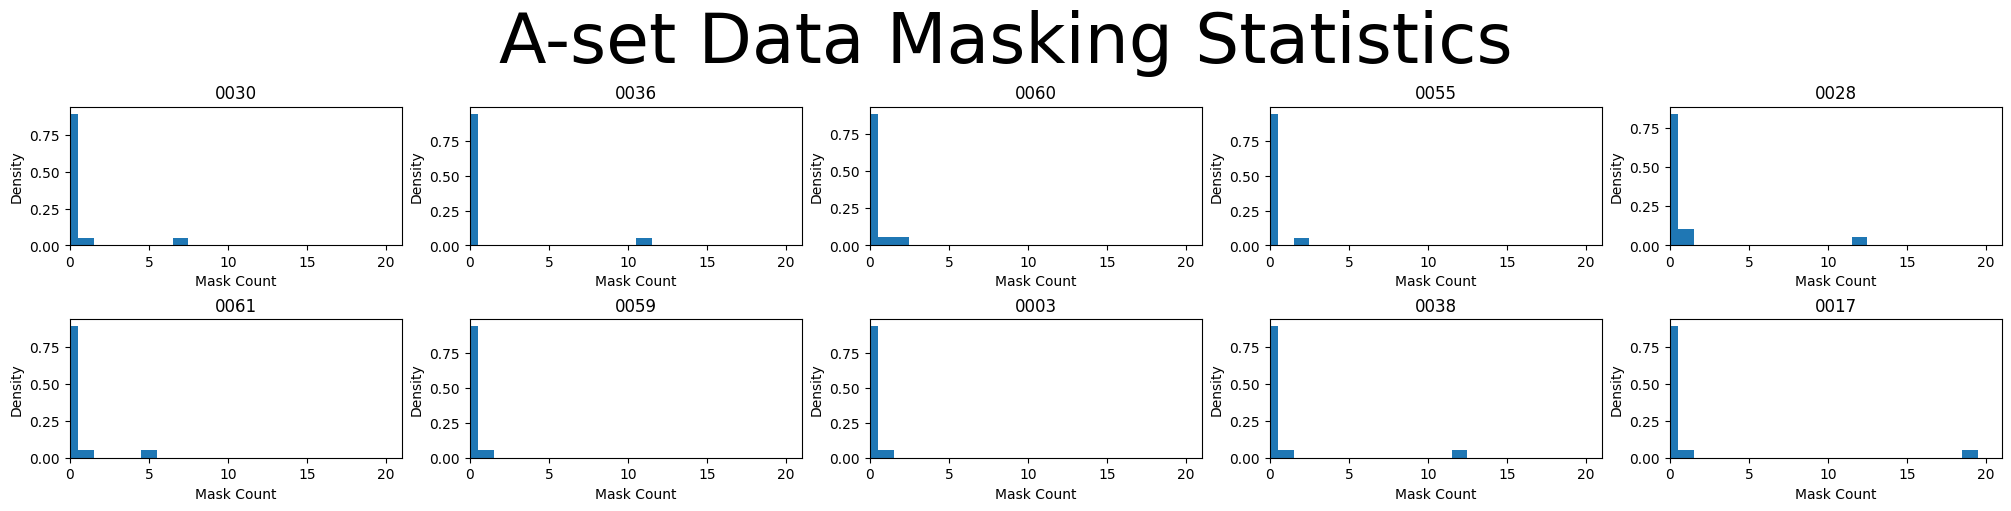

In [112]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Masking Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['mask-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Mask Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

**Most audio data have no masking of words in the transcription. To be specific, at least 75% of the data, generalized from the 10 sample analyses, have no masking at all.**

In [113]:
for key, item in data.items():
    print(f"Key: {key}\n{item['annotation_P']['mask-count'].describe()}\n")

Key: 0030
count    140.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: mask-count, dtype: float64

Key: 0061
count    250.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: mask-count, dtype: float64

Key: 0036
count    280.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: mask-count, dtype: float64

Key: 0059
count    188.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: mask-count, dtype: float64

Key: 0060
count    245.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: mask-count, dtype: float64

Key: 0003
count    285.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: mask-count, dtype: float64

Key: 0055
count 

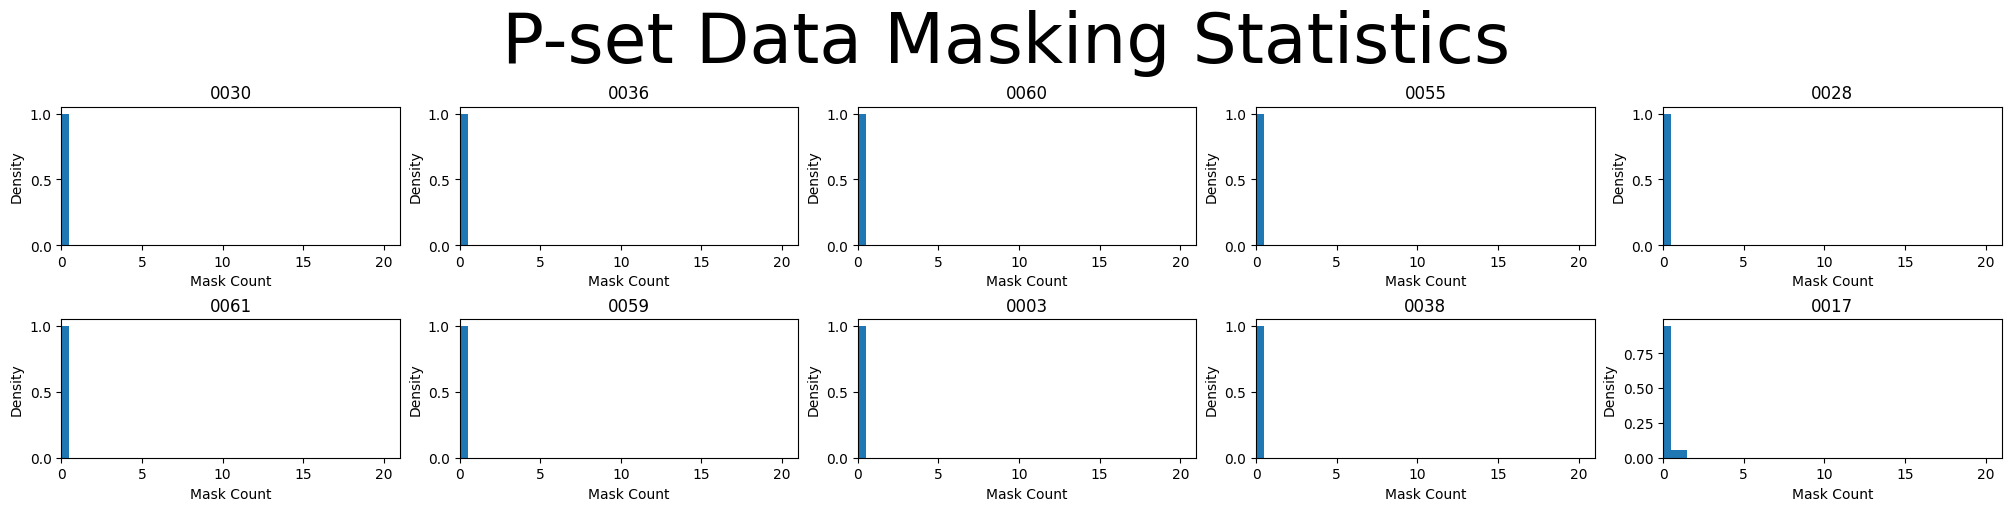

In [114]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Masking Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['mask-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Mask Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

**Almost all audio segments in the _P_ transcription have no masking of words in the transcription.**

## Stutter Statistics

In [115]:
for key, item in data.items():
    print(f"Key: {key}\n{item['annotation_A']['stutter-count'].describe()}\n")

Key: 0030
count    167.000000
mean       2.167665
std        2.194332
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: stutter-count, dtype: float64

Key: 0061
count    119.000000
mean       1.411765
std        1.189016
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: stutter-count, dtype: float64

Key: 0036
count    133.000000
mean       1.248120
std        1.322337
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: stutter-count, dtype: float64

Key: 0059
count    155.000000
mean       1.929032
std        2.159575
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        8.000000
Name: stutter-count, dtype: float64

Key: 0060
count    109.000000
mean       1.752294
std        1.754127
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        9.000000
Na

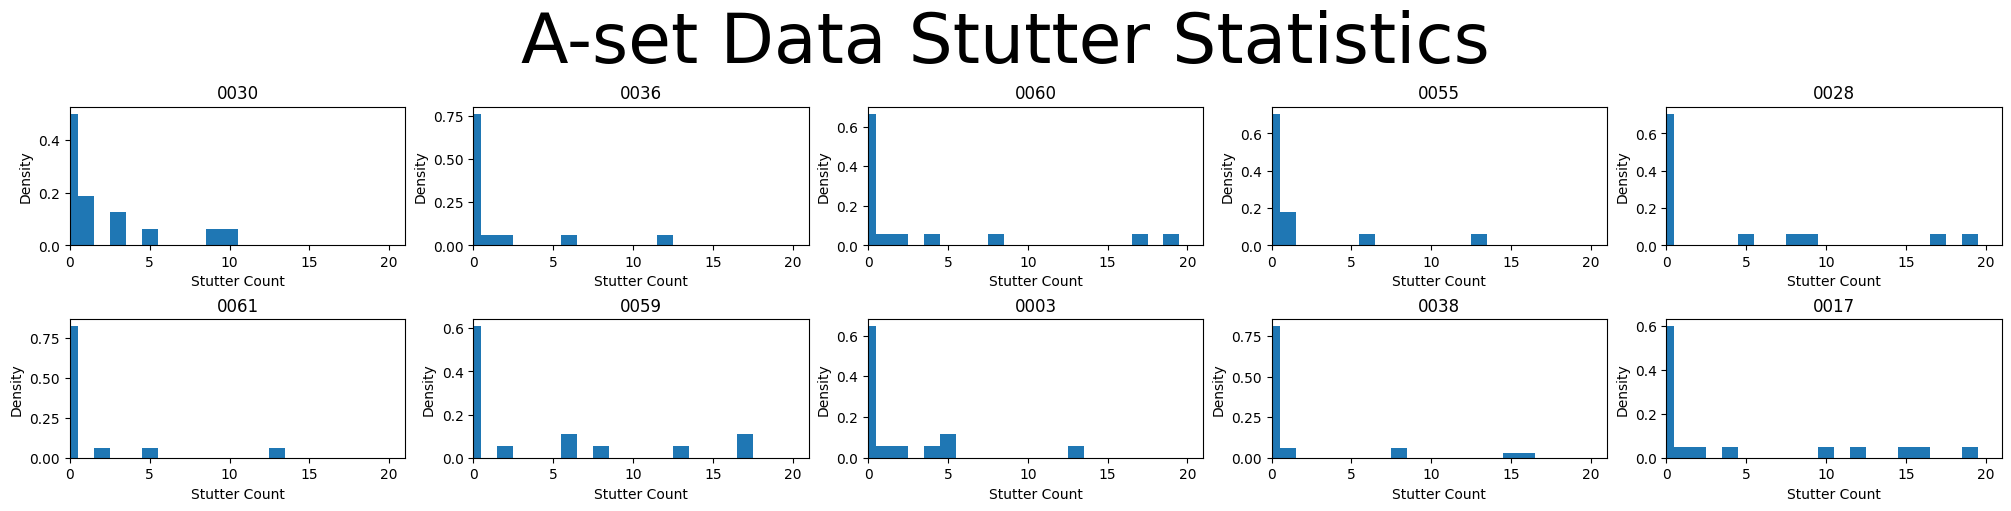

In [116]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

**In terms of stuttering, the 10 data samples show very uneven distribution of stutter occurances.**

In [117]:
for key, item in data.items():
    print(f"Key: {key}\n{item['annotation_P']['stutter-count'].describe()}\n")

Key: 0030
count    140.000000
mean       1.614286
std        1.096664
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: stutter-count, dtype: float64

Key: 0061
count    250.000000
mean       0.768000
std        1.087616
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        6.000000
Name: stutter-count, dtype: float64

Key: 0036
count    280.000000
mean       0.400000
std        0.721408
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: stutter-count, dtype: float64

Key: 0059
count    188.000000
mean       2.292553
std        2.474371
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max        9.000000
Name: stutter-count, dtype: float64

Key: 0060
count    245.000000
mean       0.379592
std        0.814062
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Na

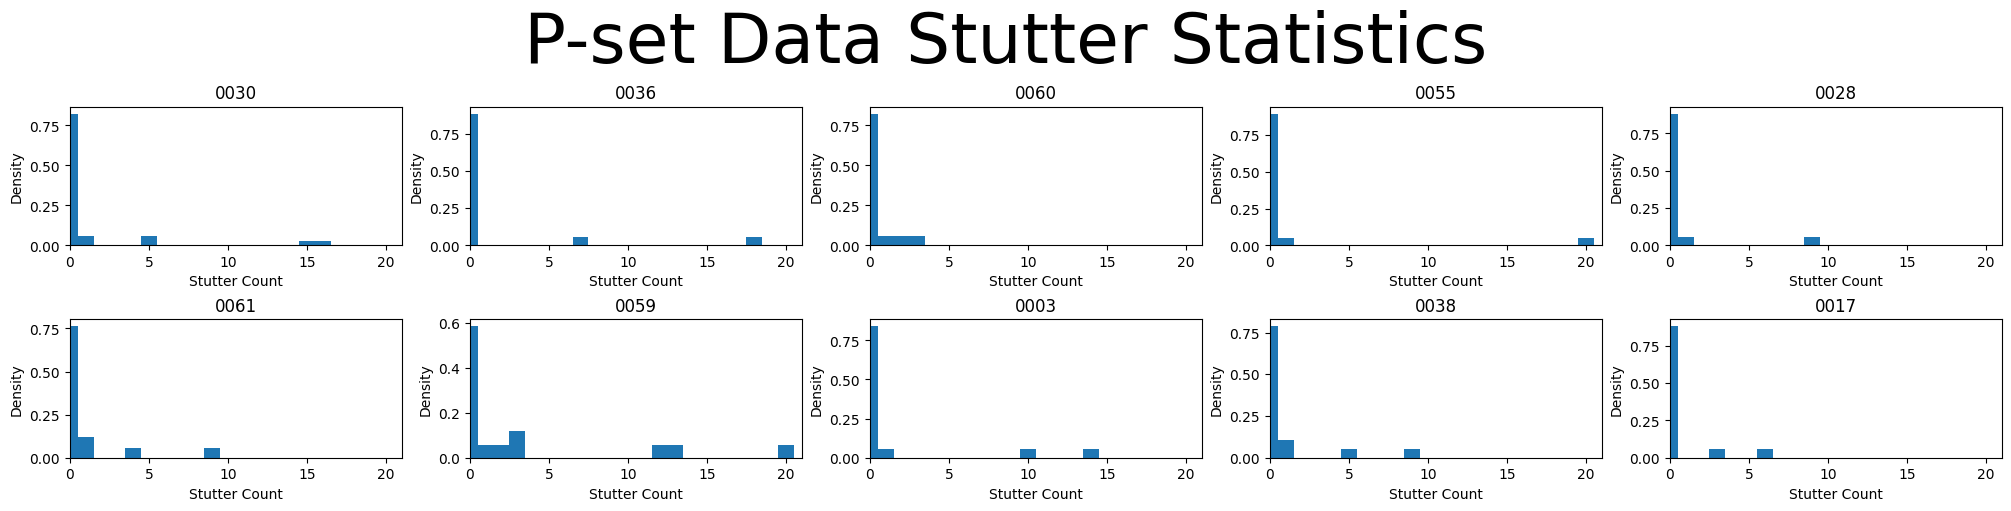

In [118]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['stutter-count']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

**The stutter occurances in the P-set data showed mostly zero count. Generalized, the P-set data overall show a comparably less amount of stutter occurances compared to the A-set data.**

## Duration Statistics

In [119]:
for key, item in data.items():
    print(f"Key: {key}\n{item['audio_A']['audio-length'].describe()}\n")

Key: 0030
count    169.000000
mean       6.827041
std        3.117037
min        0.860000
25%        4.610000
50%        6.760000
75%        9.010000
max       14.820000
Name: audio-length, dtype: float64

Key: 0061
count    126.000000
mean       4.906508
std        2.522336
min        0.370000
25%        3.147500
50%        4.695000
75%        6.482500
max       11.920000
Name: audio-length, dtype: float64

Key: 0036
count    134.000000
mean       7.350373
std        4.026778
min        0.330000
25%        4.055000
50%        7.075000
75%       10.795000
max       14.920000
Name: audio-length, dtype: float64

Key: 0059
count    156.000000
mean       5.488654
std        3.867659
min        0.430000
25%        2.317500
50%        4.780000
75%        8.190000
max       18.250000
Name: audio-length, dtype: float64

Key: 0060
count    109.000000
mean       5.128165
std        3.107250
min        0.310000
25%        2.340000
50%        5.100000
75%        7.010000
max       13.430000
Name: 

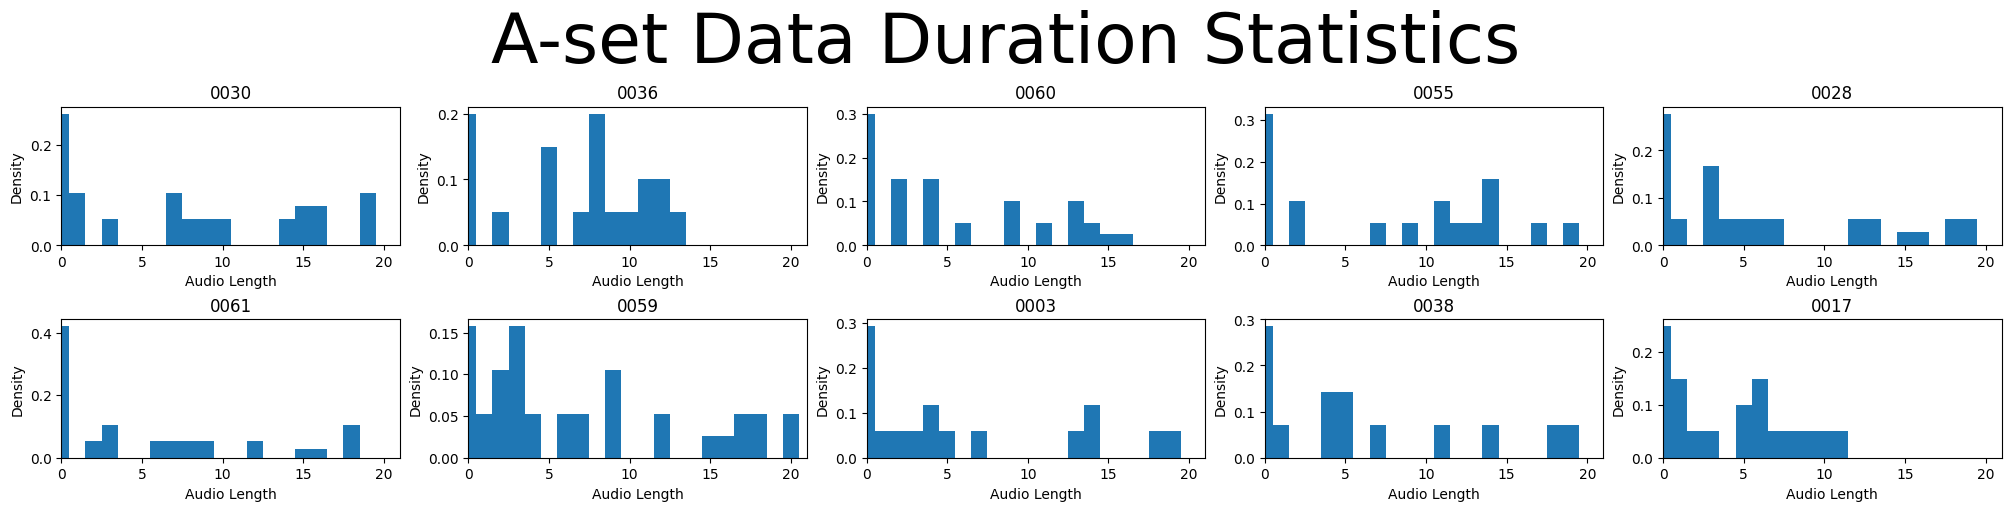

In [120]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Duration Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['audio_A']['audio-length']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Audio Length')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

**The length of the audio from the A-set dataset show high variability in the duration of audio file.**

In [121]:
for key, item in data.items():
    print(f"Key: {key}\n{item['audio_P']['audio-length'].describe()}\n")

Key: 0030
count    140.000000
mean       6.008429
std        2.717798
min        1.870000
25%        4.032500
50%        5.120000
75%        7.535000
max       12.750000
Name: audio-length, dtype: float64

Key: 0061
count    250.000000
mean       3.855760
std        1.585028
min        1.060000
25%        2.747500
50%        3.690000
75%        4.840000
max       10.100000
Name: audio-length, dtype: float64

Key: 0036
count    280.000000
mean       3.553679
std        1.929527
min        1.150000
25%        2.062500
50%        3.010000
75%        4.567500
max       11.140000
Name: audio-length, dtype: float64

Key: 0059
count    188.000000
mean       2.643138
std        1.110022
min        0.990000
25%        1.815000
50%        2.530000
75%        2.990000
max        8.300000
Name: audio-length, dtype: float64

Key: 0060
count    245.000000
mean       4.328939
std        2.518345
min        0.870000
25%        2.410000
50%        3.880000
75%        5.570000
max       13.350000
Name: 

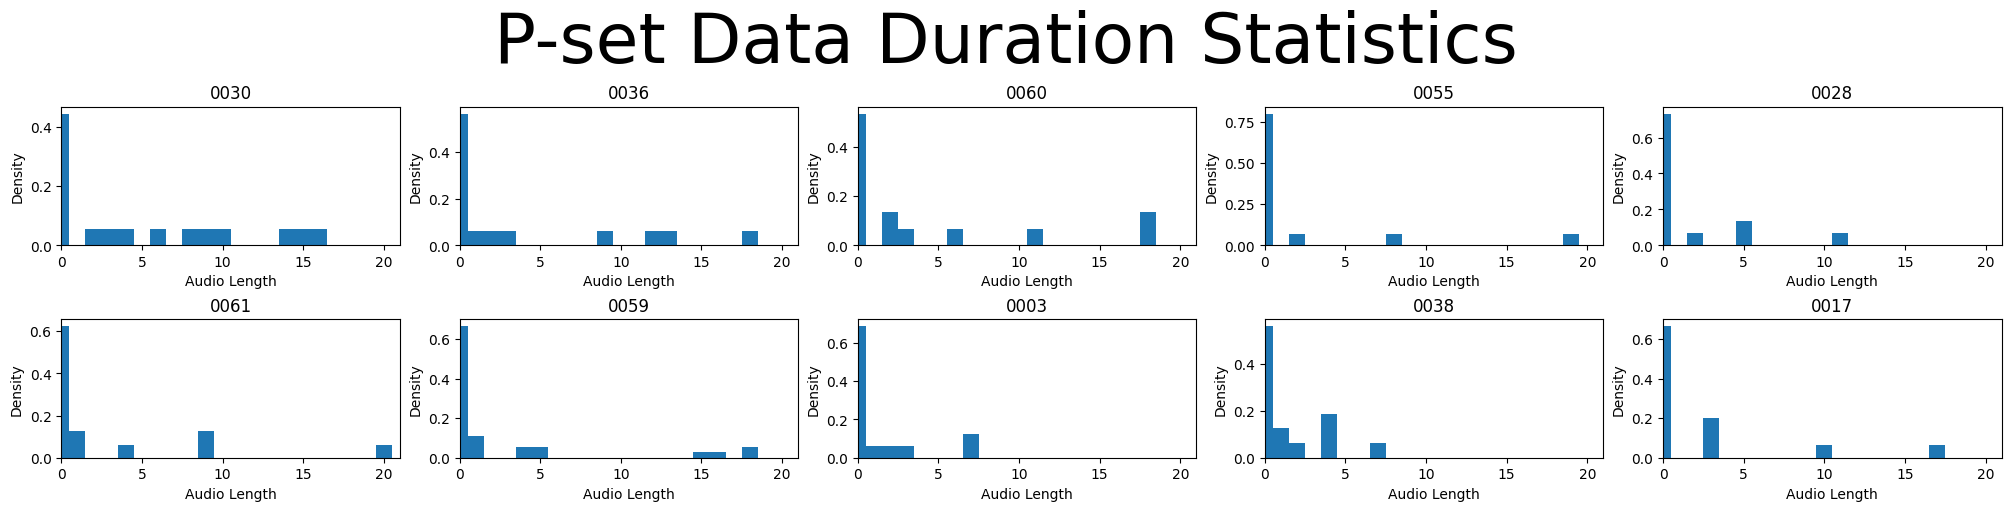

In [122]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Duration Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['audio_P']['audio-length']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Audio Length')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

**The P-set dataset shows comparably shorter average length of the audio file with low variability as well.**

## Stutter Variation Analysis

Stuttering Type Analysis
* [] - Word-level repetition
* /r - sound repetition
* /b - blocks
* /p - prolongation
* /i - interjection

In [123]:
for key, _data in data.items():
  data[key]['annotation_A']['stutter-count_[]'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('[')))
  data[key]['annotation_P']['stutter-count_[]'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('[')))
  data[key]['annotation_A']['stutter-count_/r'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/r')))
  data[key]['annotation_P']['stutter-count_/r'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/r')))
  data[key]['annotation_A']['stutter-count_/b'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/b')))
  data[key]['annotation_P']['stutter-count_/b'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/b')))
  data[key]['annotation_A']['stutter-count_/p'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/p')))
  data[key]['annotation_P']['stutter-count_/p'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/p')))
  data[key]['annotation_A']['stutter-count_/i'] = _data['annotation_A']['transcription'].apply(lambda x: (x.count('/i')))
  data[key]['annotation_P']['stutter-count_/i'] = _data['annotation_P']['transcription'].apply(lambda x: (x.count('/i')))

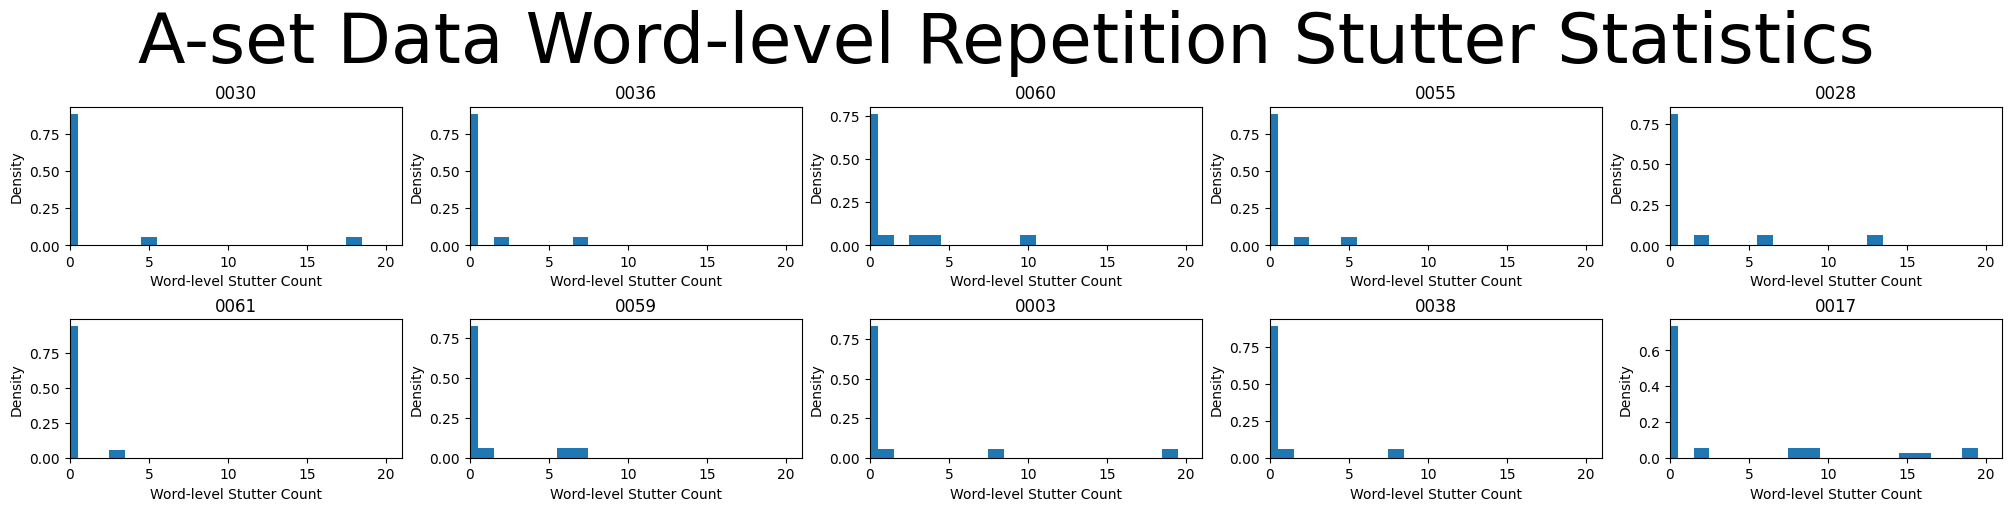

In [124]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Word-level Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count_[]']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Word-level Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

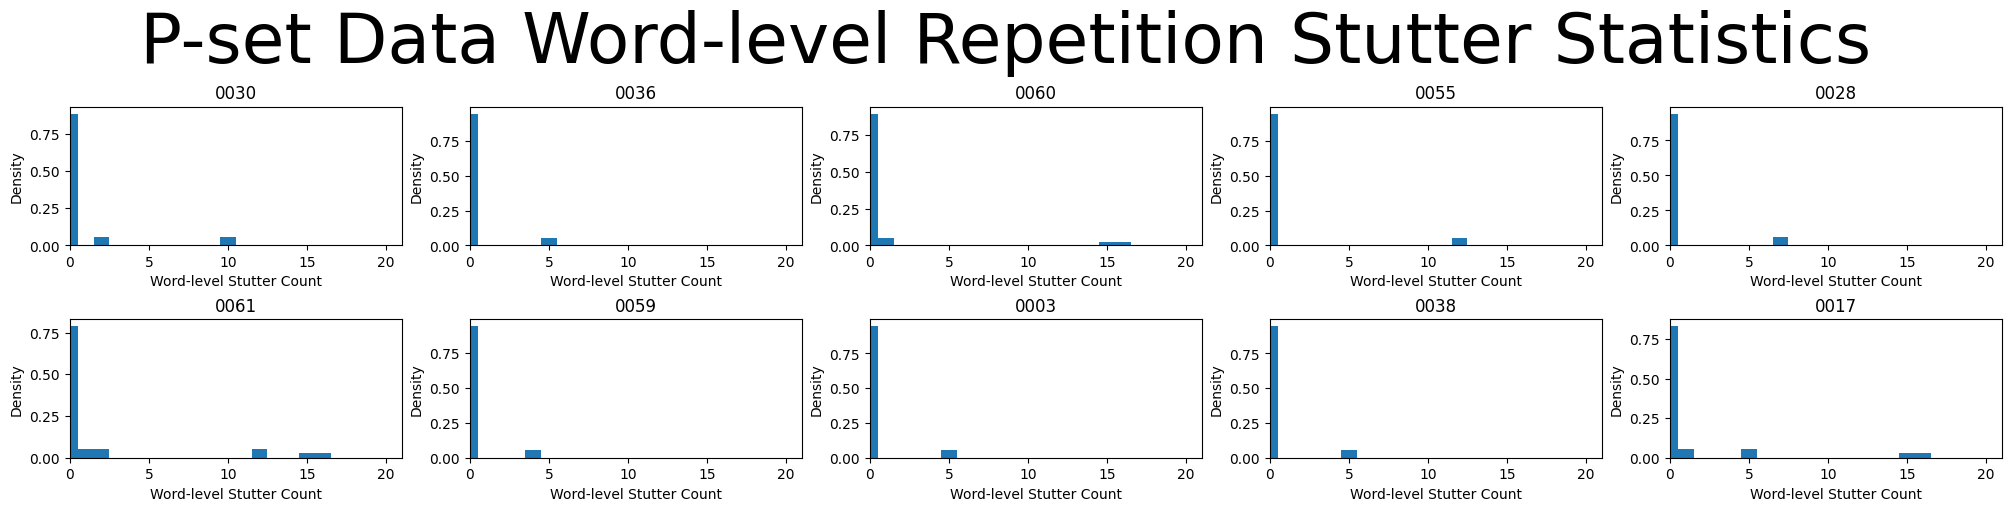

In [125]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Word-level Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['stutter-count_[]']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Word-level Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

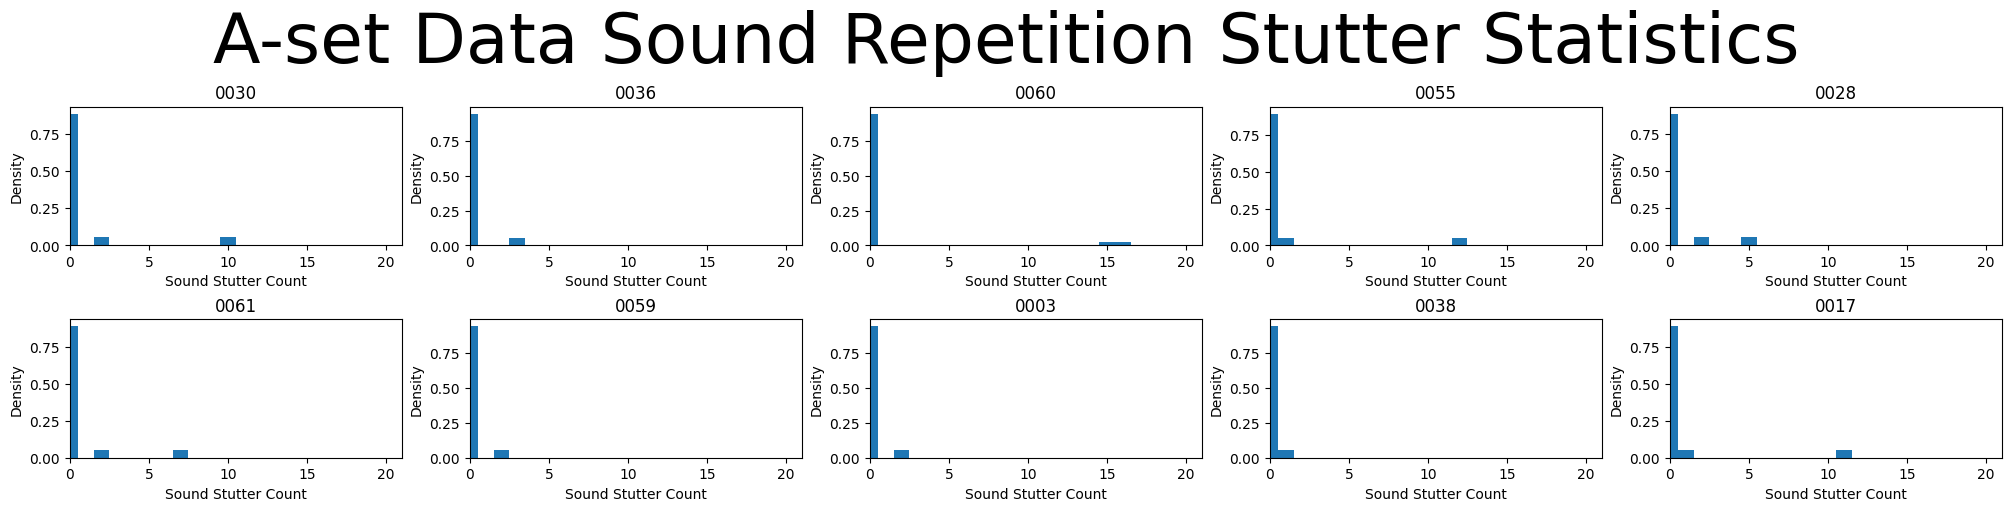

In [126]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Sound Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count_/r']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Sound Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

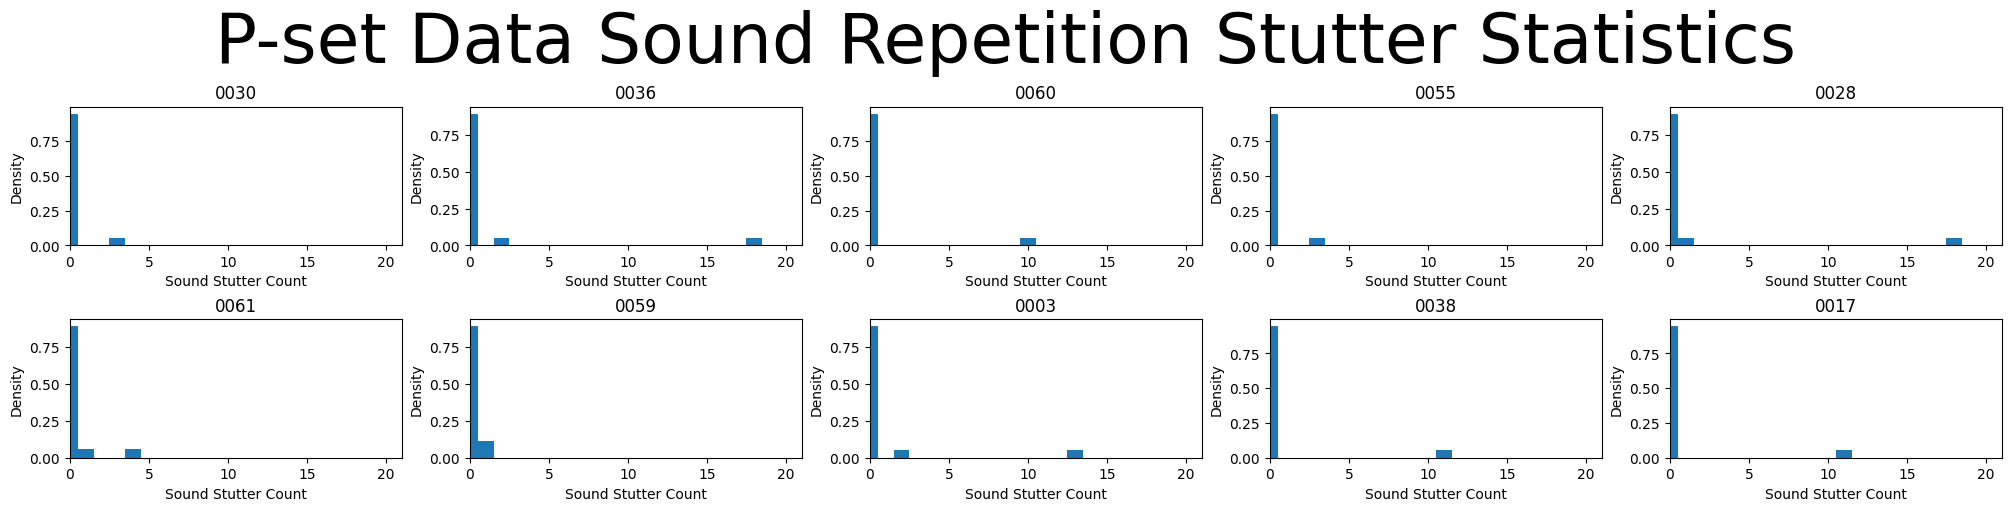

In [127]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('P-set Data Sound Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_P']['stutter-count_/r']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Sound Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

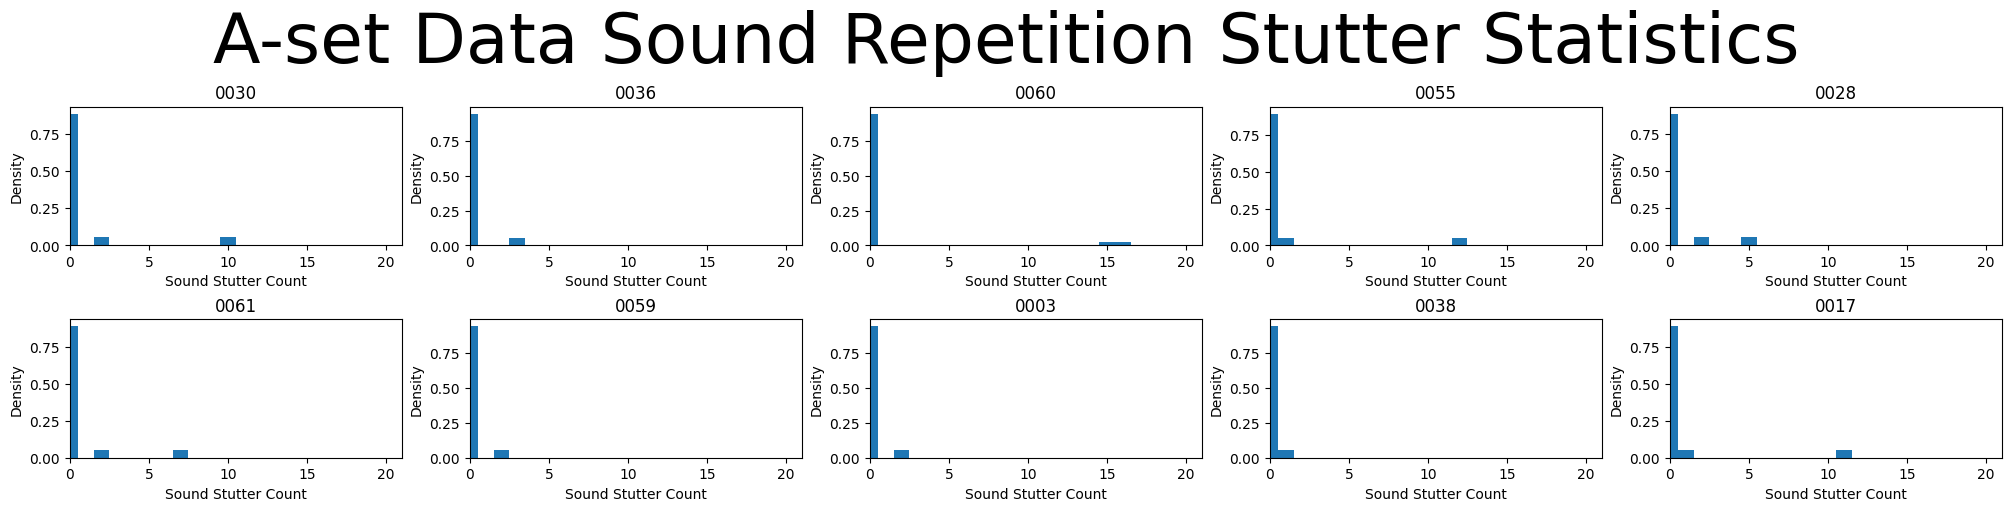

In [128]:
fig, axs = plt.subplots(2, 5, layout="constrained", figsize=(20,5))

fig.suptitle('A-set Data Sound Repetition Stutter Statistics', fontsize=50)
x, y = 0, 0
for key, item in data.items():
    _data = item['annotation_A']['stutter-count_/r']
    hist, bin_edges = np.histogram(_data, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,16.5,17.5,18.5,19.5,20.5])
    axs[y, x].hist(hist, bins=bin_edges, density=True)
    axs[y, x].set_xlim(0, 21)
    axs[y, x].set_xlabel('Sound Stutter Count')
    axs[y, x].set_ylabel('Density')
    axs[y, x].set_title(f'{key}')
    if (y < 2 - 1):
        y += 1
    else:
        y = 0
        if (x < 10 - 1):
            x += 1
        else:
            break

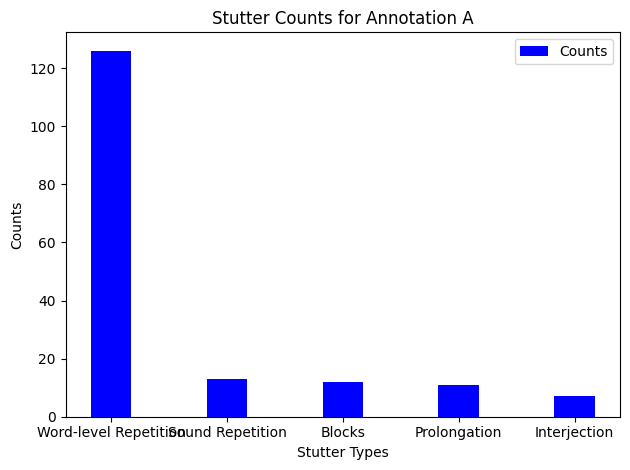

In [129]:
stuttering_types = {
    'Word-level Repetition': 'stutter-count_[]',
    'Sound Repetition': 'stutter-count_/r',
    'Blocks': 'stutter-count_/b',
    'Prolongation': 'stutter-count_/p',
    'Interjection': 'stutter-count_/i'
}

counts = [data[key]['annotation_A'][col].sum() for col in stuttering_types.values()]

x = np.arange(len(stuttering_types))
width = 0.35
fig, ax = plt.subplots()

ax.bar(x, counts, width, color='blue')

ax.set_xlabel('Stutter Types')
ax.set_ylabel('Counts')
ax.set_title(f'Stutter Counts for Annotation A')
ax.set_xticks(x)
ax.set_xticklabels(stuttering_types.keys())
ax.legend(['Counts'])

plt.tight_layout()
plt.show()

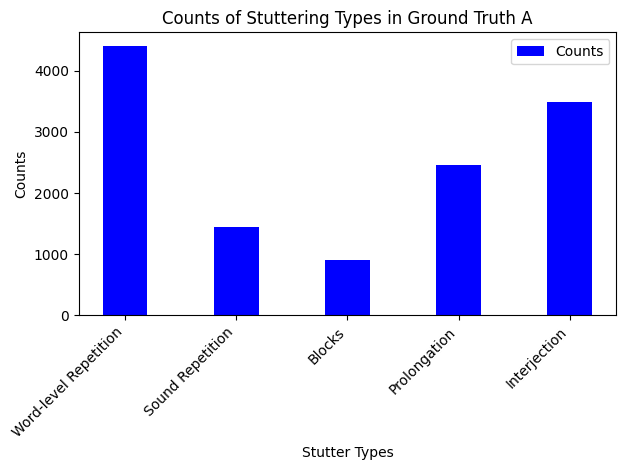

In [130]:
gt_A = pd.read_csv(ground_truth_A)

gt_transcript_A = gt_A['ground_truth']

stutter_types = {
    'Word-level Repetition': list,
    'Sound Repetition': list,
    'Blocks': list,
    'Prolongation': list,
    'Interjection': list
}

stutter_types['Word-level Repetition'] = gt_transcript_A[gt_transcript_A.str.contains(r'\[')].index.tolist()
stutter_types['Sound Repetition'] = gt_transcript_A[gt_transcript_A.str.contains(r'/r')].index.tolist()
stutter_types['Blocks'] = gt_transcript_A[gt_transcript_A.str.contains(r'/b')].index.tolist()
stutter_types['Prolongation'] = gt_transcript_A[gt_transcript_A.str.contains(r'/p')].index.tolist()
stutter_types['Interjection'] = gt_transcript_A[gt_transcript_A.str.contains(r'/i')].index.tolist()

counts = [len(stutter_types[key]) for key in stutter_types]

x = np.arange(len(stutter_types))  
width = 0.4

fig, ax = plt.subplots()

# Plotting the bar chart
ax.bar(x, counts, width, color='blue')

ax.set_xlabel('Stutter Types')
ax.set_ylabel('Counts')
ax.set_title('Counts of Stuttering Types in Ground Truth A')
ax.set_xticks(x)
ax.set_xticklabels(stutter_types.keys())  
ax.legend(['Counts'])

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
